# Titanic 
----

In [270]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [141]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras import regularizers

In [244]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

## Explore the data

In [245]:
print(f'Shape: {df_train.shape}')
df_train.head()

Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [246]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [247]:
unique = None

categorical = df_train.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    unique = column.nunique()
    print(unique)

Name
891
Sex
2
Ticket
681
Cabin
147
Embarked
3


In [248]:
df_train['Cabin'].isnull().sum()

687

In [249]:
df_train = df_train.loc[:, ~df_train.columns.isin(['Name', 'Ticket', 'Cabin', 'PassengerId'])]
df_test = df_test.loc[:, ~df_test.columns.isin(['Name', 'Ticket', 'Cabin', 'PassengerId'])]

df_train = pd.get_dummies(data=df_train, columns=['Sex', 'Embarked'], drop_first=True)
df_test = pd.get_dummies(data=df_test, columns=['Sex', 'Embarked'], drop_first=True)

In [250]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [251]:
nans = lambda X: X[X.isnull().any(axis=1)]
len(nans(df_train))

177

In [252]:
df_train['Age'].isnull().sum()

177

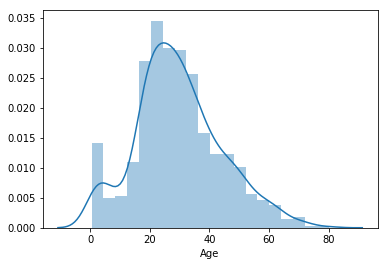

In [253]:
sns.distplot(df_train['Age'].dropna())

In [254]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp = imp.fit(df_train[['Age']])

# Impute our data
df_train['Age'] = np.round(imp.transform(df_train[['Age']]), 2)

In [255]:
imp = imp.fit(df_test[['Age']])

# Impute our data
df_test['Age'] = np.round(imp.transform(df_test[['Age']]), 2)

In [256]:
df_train['Age'].isnull().sum()

0

In [257]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [258]:
# norm_df_train = (df_train[['Pclass', 'SibSp', 'Age', 'Parch', 'Fare']]-df_train[['Pclass', 'SibSp', 'Age', 'Parch', 'Fare']].mean())/df_train[['Pclass', 'SibSp', 'Age', 'Parch', 'Fare']].std()
# norm_df_test = (df_test[['Pclass', 'SibSp', 'Age', 'Parch', 'Fare']]-df_test[['Pclass', 'SibSp', 'Age', 'Parch', 'Fare']].mean())/df_test[['Pclass', 'SibSp', 'Age', 'Parch', 'Fare']].std()

df_train[['Pclass', 'SibSp', 'Age', 'Parch', 'Fare']] = (df_train[['Pclass', 'SibSp', 'Age', 'Parch', 'Fare']]-df_train[['Pclass', 'SibSp', 'Age', 'Parch', 'Fare']].min())/(df_train[['Pclass', 'SibSp', 'Age', 'Parch', 'Fare']].max()-df_train[['Pclass', 'SibSp', 'Age', 'Parch', 'Fare']].min())
df_test[['Pclass', 'SibSp', 'Age', 'Parch', 'Fare']] = (df_test[['Pclass', 'SibSp', 'Age', 'Parch', 'Fare']]-df_test[['Pclass', 'SibSp', 'Age', 'Parch', 'Fare']].min())/(df_test[['Pclass', 'SibSp', 'Age', 'Parch', 'Fare']].max()-df_test[['Pclass', 'SibSp', 'Age', 'Parch', 'Fare']].min())


In [259]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,1.0,0.271174,0.125,0.0,0.014151,1,0,1
1,1,0.0,0.472229,0.125,0.0,0.139136,0,0,0
2,1,1.0,0.321438,0.000,0.0,0.015469,0,0,1
3,1,0.0,0.434531,0.125,0.0,0.103644,0,0,1
4,0,1.0,0.434531,0.000,0.0,0.015713,1,0,1


In [260]:
y_train = to_categorical(df_train['Survived'])
y_train_rf = df_train['Survived']

df_train = df_train.loc[:, ~df_train.columns.isin(['Survived'])]

X_train = df_train.values
X_test = df_test.values

## NN Model

In [241]:
n_cols = X_train.shape[1]
input_shape = (n_cols,)

# Init model
model = Sequential()

model.add(Dense(70, activation='relu',  input_shape = input_shape))
model.add(Dense(70,  activation='relu'))
model.add(Dense(70, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
hist = model.fit(X_train, y_train, validation_split=0.3, epochs=10, callbacks=[early_stopping_monitor])

Train on 623 samples, validate on 268 samples
Epoch 1/10
623/623 [==============================] - 2s 4ms/step - loss: 0.5935 - acc: 0.7079 - val_loss: 0.5268 - val_acc: 0.7799
Epoch 2/10
623/623 [==============================] - 0s 97us/step - loss: 0.5078 - acc: 0.7913 - val_loss: 0.4778 - val_acc: 0.7799
Epoch 3/10
623/623 [==============================] - 0s 112us/step - loss: 0.4787 - acc: 0.7881 - val_loss: 0.4615 - val_acc: 0.7799
Epoch 4/10
623/623 [==============================] - 0s 118us/step - loss: 0.4635 - acc: 0.7897 - val_loss: 0.4608 - val_acc: 0.7910
Epoch 5/10
623/623 [==============================] - 0s 112us/step - loss: 0.4599 - acc: 0.7945 - val_loss: 0.4472 - val_acc: 0.7985
Epoch 6/10
623/623 [==============================] - 0s 107us/step - loss: 0.4518 - acc: 0.8010 - val_loss: 0.4437 - val_acc: 0.7985
Epoch 7/10
623/623 [==============================] - 0s 131us/step - loss: 0.4459 - acc: 0.8090 - val_loss: 0.4412 - val_acc: 0.7948
Epoch 8/10
623/623 

## Plotting the results

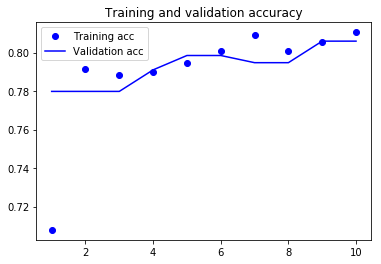

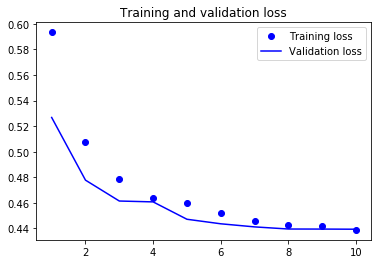

In [242]:
# Plotting
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# model.predict(X_test)

## Random Forest

In [277]:
y_train_rf.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [278]:
y_train_rf.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [272]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train_rf, test_size=0.30, random_state=42, stratify=y_train_rf)

In [281]:
rfc = ensemble.RandomForestClassifier(n_estimators=12)
rfc.fit(X_train_split, y_train_split)

print(rfc.score(X_train_split, y_train_split))
print(rfc.score(X_test_split, y_test_split))

0.9727126805778491
0.7761194029850746


In [279]:
rfc_cv = ensemble.RandomForestClassifier(n_estimators=12)
cv = cross_val_score(rfc_cv, X_train, y_train_rf, cv=5)

In [280]:
print(cv)
print(np.mean(cv))

[0.78212291 0.77653631 0.83707865 0.79775281 0.83615819]
0.8059297741283296


## IMDB

In [282]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [286]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [289]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [290]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [305]:
imdb_model = Sequential()
imdb_model.add(Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=(10000,)))
imdb_model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
imdb_model.add(Dense(1, activation='sigmoid'))

imdb_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

imdb_history = imdb_model.fit(x_train,
                            y_train,
                            epochs=10,
                            batch_size=512,
                            validation_split=0.3,
                             callbacks=[early_stopping_monitor])

Train on 17500 samples, validate on 7500 samples
Epoch 1/10
17500/17500 [==============================] - 4s 226us/step - loss: 0.5596 - acc: 0.7923 - val_loss: 0.4393 - val_acc: 0.8735
Epoch 2/10
17500/17500 [==============================] - 1s 85us/step - loss: 0.3708 - acc: 0.8975 - val_loss: 0.3714 - val_acc: 0.8785
Epoch 3/10
17500/17500 [==============================] - 1s 85us/step - loss: 0.3042 - acc: 0.9165 - val_loss: 0.3490 - val_acc: 0.8808
Epoch 4/10
17500/17500 [==============================] - 2s 91us/step - loss: 0.2679 - acc: 0.9292 - val_loss: 0.3265 - val_acc: 0.8920
Epoch 5/10
17500/17500 [==============================] - 2s 86us/step - loss: 0.2476 - acc: 0.9345 - val_loss: 0.3330 - val_acc: 0.8873
Epoch 6/10
17500/17500 [==============================] - 2s 86us/step - loss: 0.2328 - acc: 0.9410 - val_loss: 0.3403 - val_acc: 0.8857


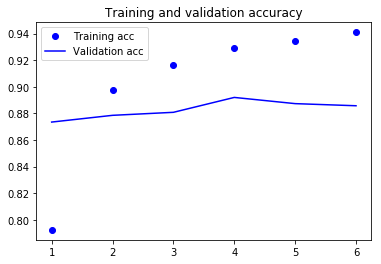

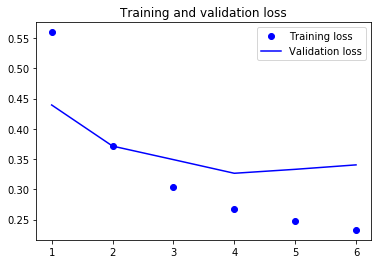

In [306]:
# Plotting
acc = imdb_history.history['acc']
val_acc = imdb_history.history['val_acc']
loss = imdb_history.history['loss']
val_loss = imdb_history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [307]:
results = imdb_model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 134us/step


In [308]:
results

[0.35520346493721006, 0.87816]

Test accuracy of 88%.

## Random Forest IMDB

In [296]:
x_train_imdb_rf, x_test_imdb_rf, y_train_imdb_rf, y_test_imdb_rf = train_test_split(x_train, y_train, test_size=0.30, random_state=42)

In [297]:
rfc = ensemble.RandomForestClassifier(n_estimators=12)
rfc.fit(x_train_imdb_rf, y_train_imdb_rf)

print(rfc.score(x_train_imdb_rf, y_train_imdb_rf))
print(rfc.score(x_test_imdb_rf, y_test_imdb_rf))

0.9959428571428571
0.7672


In [309]:
rfc_cv_imdb = ensemble.RandomForestClassifier(n_estimators=12)
cv_imdb = cross_val_score(rfc_cv_imdb, x_train, y_train, cv=5)

In [310]:
print(cv_imdb)
print(np.mean(cv_imdb))

[0.775  0.7718 0.7716 0.772  0.7712]
0.7723199999999999
